In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Optional: Check class names
# print(data.target_names)  # ['malignant' 'benign']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=100,        # number of boosting rounds
    learning_rate=0.1,       # step size
    max_depth=3,             # depth of each tree
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy on test set:", round(accuracy * 100, 2), "%\n")

# Detailed classification report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


✅ Accuracy on test set: 95.61 %

📋 Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



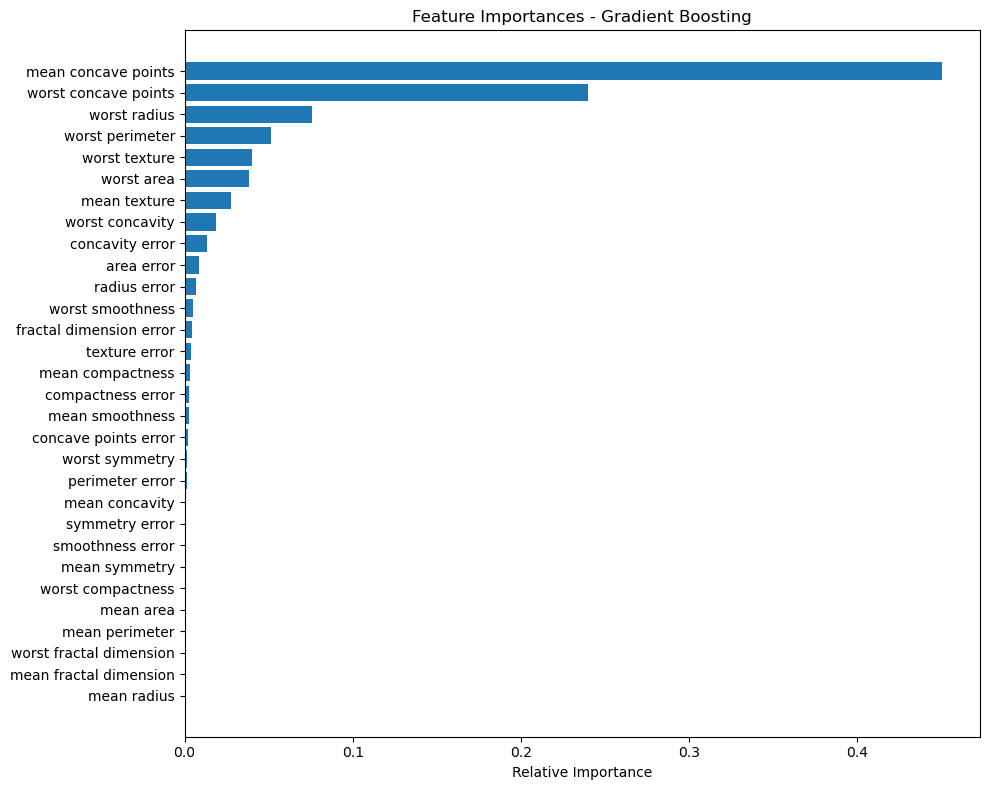

In [4]:
#FEATURE IMPORTANCE PLOT
import matplotlib.pyplot as plt

# Plot Feature Importances
importances = model.feature_importances_
features = data.feature_names

# Sort
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importances - Gradient Boosting")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [6]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Show individual scores and average
print("Cross-validation scores (5-fold):", cv_scores)
print("Average CV accuracy:", round(cv_scores.mean() * 100, 2), "%")


Cross-validation scores (5-fold): [0.92982456 0.94736842 0.97368421 0.98245614 0.98230088]
Average CV accuracy: 96.31 %
